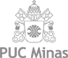
<B>PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS

NÚCLEO DE EDUCAÇÃO A DISTÂNCIA

Pós-graduação Lato Sensu em Ciência de Dados e Big Data

Título: Segmentação de Vendedores do marketplace Olist Store em 2017

Aluno: Alexandre Luís Nunes Cardiga</B>


<B>Nome:</B> 03_03_Modelos_MeanShift.ipynb

<B>Data:</B> 10/04/2022
    
<a class="anchor" id="etapas"></a>

## Indice

1. [Redução Dimensões](#reduzdimi)<br>
&emsp;1.1 [PCA](#pca)<br>
&emsp;1.2 [t-SNE](#tsne)<br>
&emsp;1.3 [UMAP](#uma)<br>
2. [Sem Redução](#semr)<br>
3. [Análise do dataframe df_score](#analise)<br>


<p><b>Localização Projeto: </b> <a href = 'https://github.com/Alexandre-316/Projeto_Ciencia_de_Dados' target = "_blank">Git Hub</a></p>

In [1]:
# Apaga todas as variáveis
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%whos

Interactive namespace is empty.


In [3]:
import sys
import os
import pandas as pd
import numpy as np
import requests
import math
import matplotlib.pyplot as plt


import seaborn as sns
#import datetime

from datetime import datetime
from random import randrange, uniform

from scipy import stats
from scipy.stats    import normaltest, kstest
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples,silhouette_score, davies_bouldin_score, calinski_harabasz_score
from random import randrange, uniform
from sklearn.cluster import MeanShift, estimate_bandwidth

import warnings 
if not sys.warnoptions:
    #warnings.filterwarnings('ignore')
    warnings.simplefilter('ignore')

# Define a pasta onde está o arquivo minhas_funcoes.py
sys.path.insert(0, '../Lib')

# Importar minhas_funcoes.py
import minhas_funcoes as mf

import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

caminho = '../Data/'
caminho_temp = '../Template/'

#exibe todas as colunas
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', 150)
#pd.set_option('display.max_columns', 999999999)
#pd.set_option('display.max_rows', 999999999)
pd.set_option('display.max_rows', 150)

## <a class="anchor" id="reduzdimi">1. Reduções de Dimensões</a>
[Retorna ao Indice](#etapas)

In [4]:
df_minmax_PCA_9_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_minmax_PCA_9_features.xlsx',index_col=0)
df_robust_PCA_9_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_robust_PCA_9_features.xlsx',index_col=0)
df_power_PCA_15_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_power_PCA_15_features.xlsx',index_col=0)


In [5]:
#df_abt = pd.read_excel(caminho_temp+'01_Coleta_Processamento_df_Analytic_Base_Table.xlsx')
df_minmax_TSNE_2_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_minmax_TSNE_2_features.xlsx',index_col=0)
df_robust_TSNE_2_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_robust_TSNE_2_features.xlsx',index_col=0)
df_power_TSNE_2_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_power_TSNE_2_features.xlsx',index_col=0)

In [6]:
df_minmax_SemReducao_17_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_minmax_SemReducao_17_features.xlsx',index_col=0)
df_robust_SemReducao_17_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_robust_SemReducao_17_features.xlsx',index_col=0)
df_power_SemReducao_17_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_power_SemReducao_17_features.xlsx',index_col=0)

In [7]:
df_minmax_UMAP_2_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_minmax_UMAP_2_features.xlsx',index_col=0)
df_robust_UMAP_2_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_robust_UMAP_2_features.xlsx',index_col=0)
df_power_UMAP_2_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_power_UMAP_2_features.xlsx',index_col=0)

In [8]:
df_abt = pd.read_excel(caminho_temp+'01_Coleta_Processamento_df_Analytic_Base_Table.xlsx')
#sem correlação
df_abt_sc=pd.read_excel(caminho_temp+'02_Coleta_Processamento_df_abt_sem_correlacao.xlsx')

In [9]:
df_abt_= df_abt_sc.select_dtypes(include=["int64", "float64"])
df_score= pd.DataFrame(columns= ['Algor.','Transf.', 'Red.Dim.','Features','quantile','clusters','silhouette', 'davies', 'calinski'])


In [10]:
df_abt.shape,df_abt_.shape

((1658, 114), (1658, 17))

## <a class="anchor" id="pca">1.1. PCA</a>

## MinMaxScaler

,Algor.,Transf.,Red.Dim.,Features,quantile,clusters,silhouette,davies,calinski
0,MEANSHIFT,MinMaxScaler,PCA,9,0.400,8,0.399886,1.131538,34.296904
1,MEANSHIFT,MinMaxScaler,PCA,9,0.545,4,0.463354,0.995483,27.572889
2,MEANSHIFT,MinMaxScaler,PCA,9,0.741,3,0.513884,0.955855,13.012338
3,MEANSHIFT,MinMaxScaler,PCA,9,0.749,3,0.513884,0.955855,13.012338
4,MEANSHIFT,MinMaxScaler,PCA,9,0.078,57,0.061906,1.060861,38.769642
5,MEANSHIFT,MinMaxScaler,PCA,9,0.596,3,0.494360,1.145155,14.021589
6,MEANSHIFT,MinMaxScaler,PCA,9,0.334,10,0.282436,1.164140,39.548748
7,MEANSHIFT,MinMaxScaler,PCA,9,0.425,6,0.420735,1.305983,41.766081
8,MEANSHIFT,MinMaxScaler,PCA,9,0.191,25,0.096322,1.199489,29.462540
9,MEANSHIFT,MinMaxScaler,PCA,9,0.303,10,0.288823,1.215714,35.644970


Wall time: 20.2 s


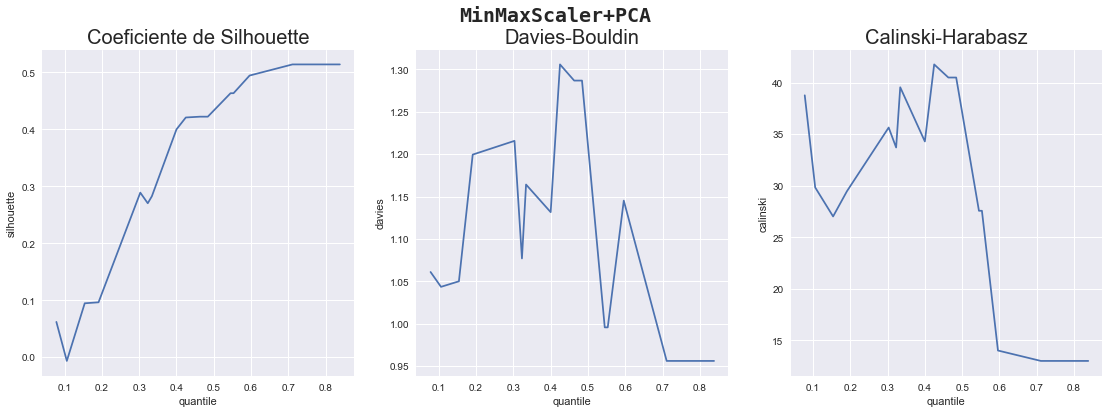

In [11]:
%%time
df_score,df_score_local,centro_clusters=mf.plot_inertia_sillhoutte_meanshift(df_score,df_minmax_PCA_9_features,0.01, 0.9, (19,6),'MinMaxScaler+PCA','MEANSHIFT','MinMaxScaler','PCA')


## RobustScaler

,Algor.,Transf.,Red.Dim.,Features,quantile,clusters,silhouette,davies,calinski
0,MEANSHIFT,RobustScaler,PCA,9,0.344,72,0.528483,0.566422,142.847821
1,MEANSHIFT,RobustScaler,PCA,9,0.355,72,0.528483,0.566422,142.847821
2,MEANSHIFT,RobustScaler,PCA,9,0.562,60,0.589185,0.520351,155.804489
3,MEANSHIFT,RobustScaler,PCA,9,0.731,51,0.583672,0.687276,159.566087
4,MEANSHIFT,RobustScaler,PCA,9,0.054,102,0.439325,0.565034,174.674217
5,MEANSHIFT,RobustScaler,PCA,9,0.405,69,0.528407,0.551467,148.125983
6,MEANSHIFT,RobustScaler,PCA,9,0.039,113,0.428352,0.545557,180.152384
7,MEANSHIFT,RobustScaler,PCA,9,0.702,54,0.583029,0.697806,153.086705
8,MEANSHIFT,RobustScaler,PCA,9,0.431,69,0.528407,0.551467,148.125983
9,MEANSHIFT,RobustScaler,PCA,9,0.809,38,0.658254,0.528728,160.513147


Wall time: 17.4 s


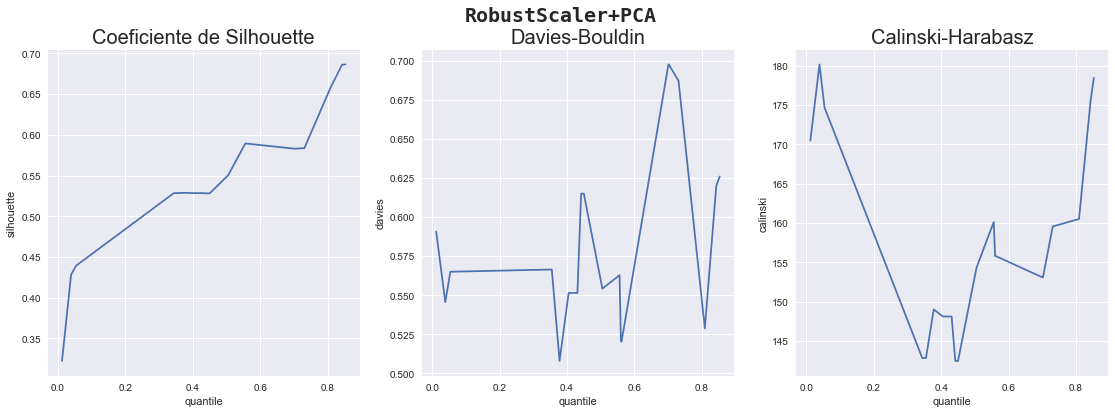

In [12]:
%%time
df_score,df_score_local,centro_clusters=mf.plot_inertia_sillhoutte_meanshift(df_score,df_robust_PCA_9_features,0.01,0.9, (19,6),'RobustScaler+PCA','MEANSHIFT','RobustScaler','PCA')


## PowerTransformer

,Algor.,Transf.,Red.Dim.,Features,quantile,clusters,silhouette,davies,calinski
0,MEANSHIFT,PowerTransformer,PCA,15,0.811,2,0.697833,0.217113,19.294625
1,MEANSHIFT,PowerTransformer,PCA,15,0.566,2,0.358731,1.318354,149.167224
2,MEANSHIFT,PowerTransformer,PCA,15,0.045,15,0.107685,1.413898,31.627288
3,MEANSHIFT,PowerTransformer,PCA,15,0.140,6,0.266484,1.314307,62.324898
4,MEANSHIFT,PowerTransformer,PCA,15,0.296,2,0.358731,1.318354,149.167224
5,MEANSHIFT,PowerTransformer,PCA,15,0.396,2,0.358731,1.318354,149.167224
6,MEANSHIFT,PowerTransformer,PCA,15,0.782,2,0.697833,0.217113,19.294625
7,MEANSHIFT,PowerTransformer,PCA,15,0.167,5,0.272647,1.334859,73.673441
8,MEANSHIFT,PowerTransformer,PCA,15,0.673,2,0.697833,0.217113,19.294625
9,MEANSHIFT,PowerTransformer,PCA,15,0.374,2,0.358731,1.318354,149.167224


Wall time: 14.4 s


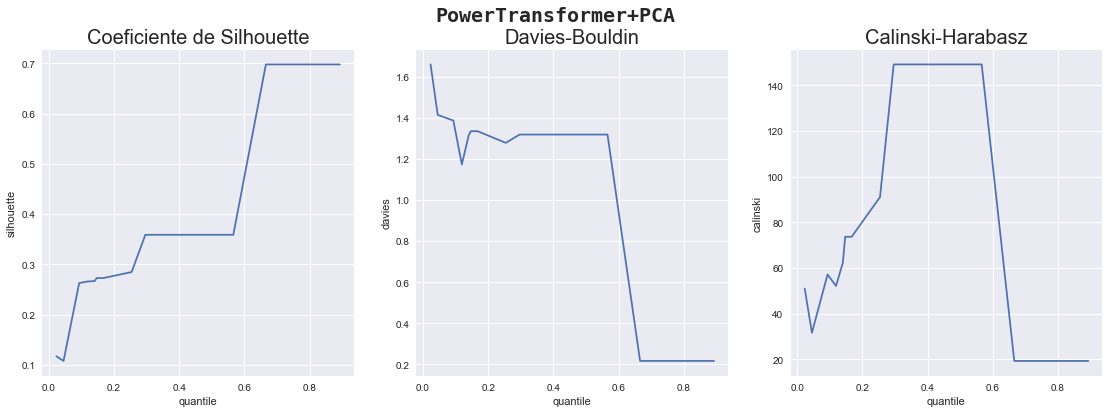

In [13]:
%%time
df_score,df_score_local,centro_clusters=mf.plot_inertia_sillhoutte_meanshift(df_score,df_power_PCA_15_features,0.01,0.9, (19,6),'PowerTransformer+PCA','MEANSHIFT','PowerTransformer','PCA')


## <a class="anchor" id="tsne">1.2. t-SNE</a>

## MinMaxScaler

,Algor.,Transf.,Red.Dim.,Features,quantile,clusters,silhouette,davies,calinski
0,MEANSHIFT,MinMaxScaler,t-SNE,2,0.226,3,0.449566,0.826828,1889.423317
1,MEANSHIFT,MinMaxScaler,t-SNE,2,0.281,2,0.456506,0.883945,1786.924771
2,MEANSHIFT,MinMaxScaler,t-SNE,2,0.033,23,0.400012,0.762900,2266.505123
3,MEANSHIFT,MinMaxScaler,t-SNE,2,0.238,3,0.448430,0.837049,1880.834499
4,MEANSHIFT,MinMaxScaler,t-SNE,2,0.150,5,0.457852,0.779815,2222.754154
5,MEANSHIFT,MinMaxScaler,t-SNE,2,0.304,2,0.444135,0.902565,1745.434594
6,MEANSHIFT,MinMaxScaler,t-SNE,2,0.110,8,0.387516,0.820660,1998.336453
7,MEANSHIFT,MinMaxScaler,t-SNE,2,0.267,2,0.457557,0.868462,1783.071205
8,MEANSHIFT,MinMaxScaler,t-SNE,2,0.124,5,0.457262,0.753460,2194.043785
9,MEANSHIFT,MinMaxScaler,t-SNE,2,0.039,17,0.412014,0.769808,2404.343941


Wall time: 9.27 s


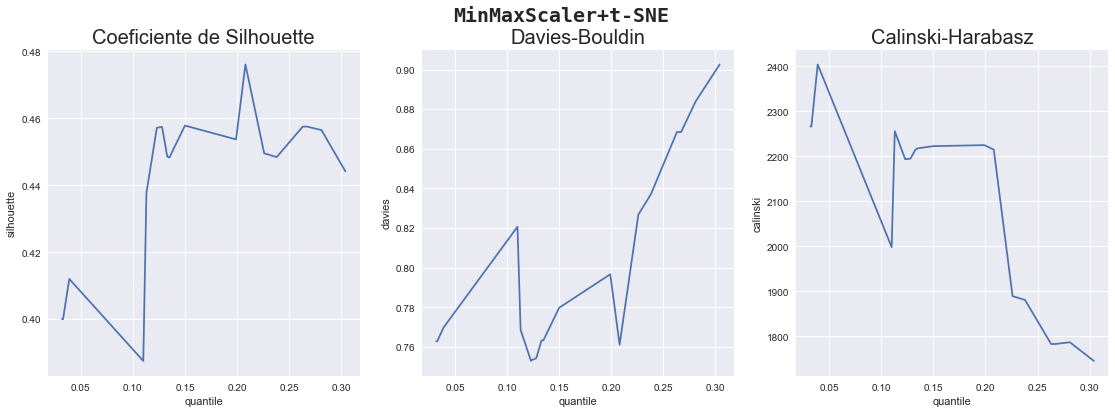

In [14]:
%%time
df_score,df_score_local,centro_clusters=mf.plot_inertia_sillhoutte_meanshift(df_score,df_minmax_TSNE_2_features, 0.01, 0.35, (19,6),'MinMaxScaler+t-SNE','MEANSHIFT','MinMaxScaler','t-SNE')


## RobustScaler

,Algor.,Transf.,Red.Dim.,Features,quantile,clusters,silhouette,davies,calinski
0,MEANSHIFT,RobustScaler,t-SNE,2,0.014,75,0.347261,0.840462,2153.743497
1,MEANSHIFT,RobustScaler,t-SNE,2,0.068,9,0.431506,0.727307,1947.860986
2,MEANSHIFT,RobustScaler,t-SNE,2,0.099,6,0.382050,0.811868,1554.490140
3,MEANSHIFT,RobustScaler,t-SNE,2,0.013,90,0.348641,0.820932,2225.882414
4,MEANSHIFT,RobustScaler,t-SNE,2,0.065,10,0.424613,0.765973,1930.463489
5,MEANSHIFT,RobustScaler,t-SNE,2,0.065,10,0.424613,0.765973,1930.463489
6,MEANSHIFT,RobustScaler,t-SNE,2,0.099,6,0.382050,0.811868,1554.490140
7,MEANSHIFT,RobustScaler,t-SNE,2,0.061,10,0.413749,0.772959,1863.361923
8,MEANSHIFT,RobustScaler,t-SNE,2,0.033,20,0.411665,0.778689,2244.511706
9,MEANSHIFT,RobustScaler,t-SNE,2,0.043,15,0.404190,0.810828,2188.226437


Wall time: 17.4 s


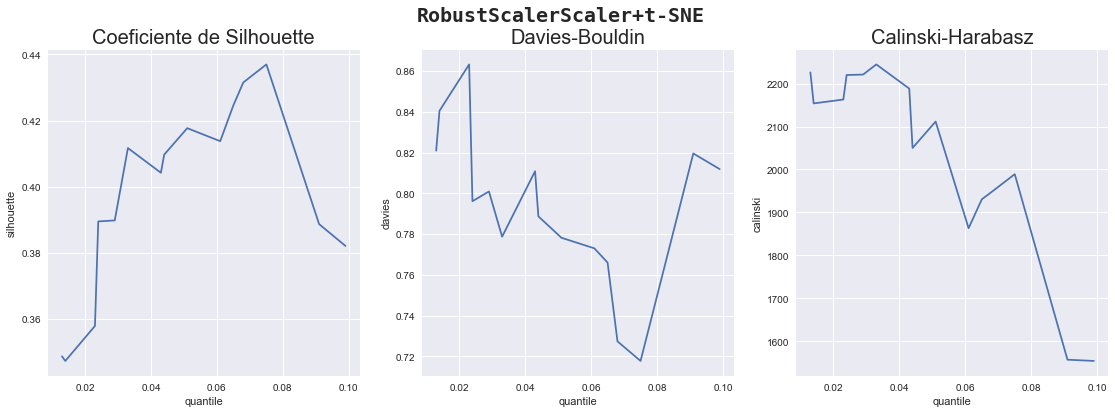

In [15]:
%%time
df_score,df_score_local,centro_clusters=mf.plot_inertia_sillhoutte_meanshift(df_score,df_robust_TSNE_2_features, 0.01, 0.1, (19,6),'RobustScalerScaler+t-SNE','MEANSHIFT','RobustScaler','t-SNE')


## PowerTransformer

,Algor.,Transf.,Red.Dim.,Features,quantile,clusters,silhouette,davies,calinski
0,MEANSHIFT,PowerTransformer,t-SNE,2,0.195,3,0.398123,0.815686,1840.140180
1,MEANSHIFT,PowerTransformer,t-SNE,2,0.191,3,0.380454,0.861751,1812.167939
2,MEANSHIFT,PowerTransformer,t-SNE,2,0.161,4,0.386697,0.808210,2245.197197
3,MEANSHIFT,PowerTransformer,t-SNE,2,0.066,9,0.416375,0.712005,2475.441363
4,MEANSHIFT,PowerTransformer,t-SNE,2,0.157,4,0.384268,0.808341,2217.288810
5,MEANSHIFT,PowerTransformer,t-SNE,2,0.135,5,0.394914,0.857558,2312.154304
6,MEANSHIFT,PowerTransformer,t-SNE,2,0.072,9,0.416522,0.739226,2508.314568
7,MEANSHIFT,PowerTransformer,t-SNE,2,0.083,9,0.425348,0.695804,2473.261557
8,MEANSHIFT,PowerTransformer,t-SNE,2,0.089,7,0.434408,0.746531,2801.290733
9,MEANSHIFT,PowerTransformer,t-SNE,2,0.112,7,0.437323,0.755305,2838.970846


Wall time: 10.2 s


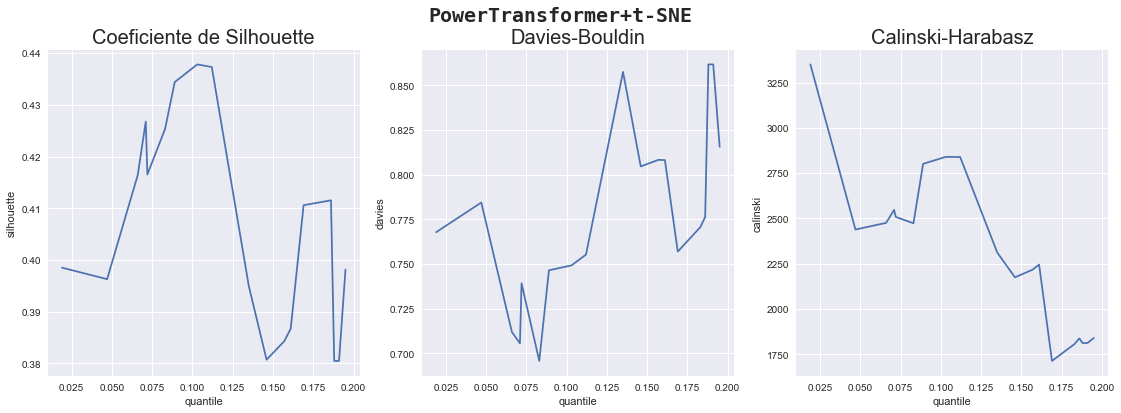

In [16]:
%%time
df_score,df_score_local,centro_clusters=mf.plot_inertia_sillhoutte_meanshift(df_score,df_power_TSNE_2_features, 0.01, 0.2, (19,6),'PowerTransformer+t-SNE','MEANSHIFT','PowerTransformer','t-SNE')


## <a class="anchor" id="uma">1.3. UMAP</a>

## MinMaxScaler

,Algor.,Transf.,Red.Dim.,Features,quantile,clusters,silhouette,davies,calinski
0,MEANSHIFT,MinMaxScaler,UMAP,2,0.346,2,0.460441,0.843681,2013.125512
1,MEANSHIFT,MinMaxScaler,UMAP,2,0.040,16,0.417985,0.766466,2261.460601
2,MEANSHIFT,MinMaxScaler,UMAP,2,0.210,5,0.469098,0.772572,2638.292957
3,MEANSHIFT,MinMaxScaler,UMAP,2,0.304,2,0.469542,0.815513,2018.489923
4,MEANSHIFT,MinMaxScaler,UMAP,2,0.164,5,0.495823,0.705452,2680.105736
5,MEANSHIFT,MinMaxScaler,UMAP,2,0.208,5,0.468887,0.773764,2637.202901
6,MEANSHIFT,MinMaxScaler,UMAP,2,0.036,23,0.447360,0.735475,3053.467850
7,MEANSHIFT,MinMaxScaler,UMAP,2,0.328,2,0.464383,0.834285,2015.453106
8,MEANSHIFT,MinMaxScaler,UMAP,2,0.342,2,0.461851,0.840242,2014.691970
9,MEANSHIFT,MinMaxScaler,UMAP,2,0.243,4,0.503144,0.705257,2669.968562


Wall time: 8.41 s


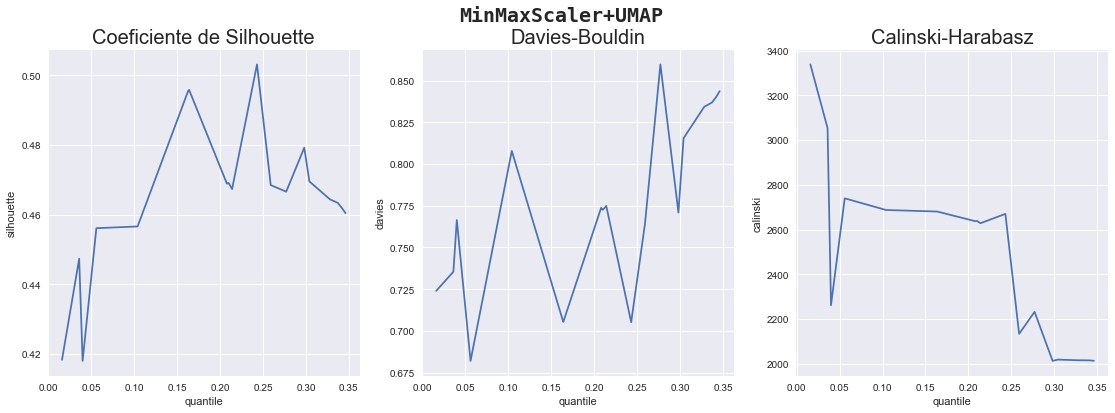

In [17]:
%%time
df_score,df_score_local,centro_clusters=mf.plot_inertia_sillhoutte_meanshift(df_score,df_minmax_UMAP_2_features, 0.01, 0.35, (19,6),'MinMaxScaler+UMAP','MEANSHIFT','MinMaxScaler','UMAP')


## RobustScaler

,Algor.,Transf.,Red.Dim.,Features,quantile,clusters,silhouette,davies,calinski
0,MEANSHIFT,RobustScaler,UMAP,2,0.141,4,0.365974,0.910102,1384.050465
1,MEANSHIFT,RobustScaler,UMAP,2,0.078,8,0.435422,0.753700,1853.586329
2,MEANSHIFT,RobustScaler,UMAP,2,0.031,26,0.402495,0.813651,2429.933018
3,MEANSHIFT,RobustScaler,UMAP,2,0.135,5,0.384052,0.859935,1554.809921
4,MEANSHIFT,RobustScaler,UMAP,2,0.170,3,0.432742,0.797494,1544.435728
5,MEANSHIFT,RobustScaler,UMAP,2,0.170,3,0.432742,0.797494,1544.435728
6,MEANSHIFT,RobustScaler,UMAP,2,0.153,4,0.358839,0.923642,1374.520599
7,MEANSHIFT,RobustScaler,UMAP,2,0.155,4,0.364317,0.915448,1389.669988
8,MEANSHIFT,RobustScaler,UMAP,2,0.017,68,0.386980,0.786157,2403.894665
9,MEANSHIFT,RobustScaler,UMAP,2,0.149,4,0.359823,0.923402,1377.316025


Wall time: 10.1 s


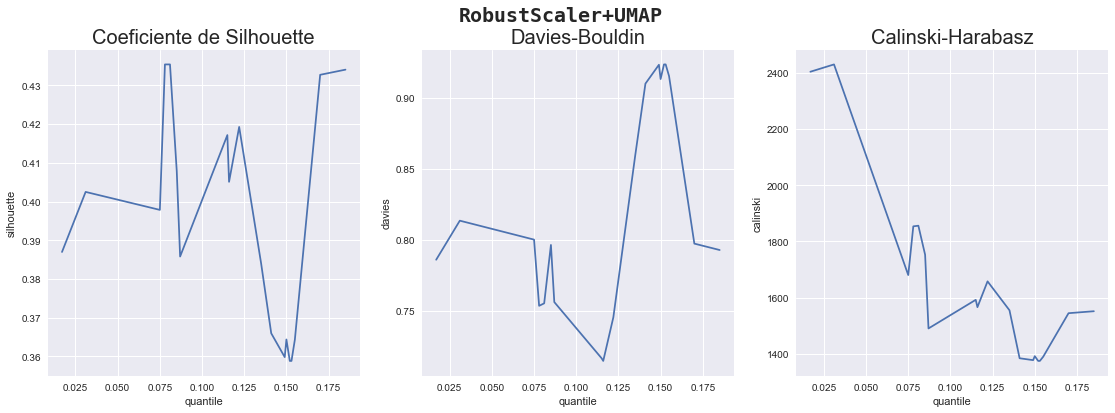

In [18]:
%%time
df_score,df_score_local,centro_clusters=mf.plot_inertia_sillhoutte_meanshift(df_score,df_robust_UMAP_2_features, 0.01, 0.2, (19,6),'RobustScaler+UMAP','MEANSHIFT','RobustScaler','UMAP')


## PowerTransformer

,Algor.,Transf.,Red.Dim.,Features,quantile,clusters,silhouette,davies,calinski
0,MEANSHIFT,PowerTransformer,UMAP,2,0.322,3,0.605590,0.498837,1461.433084
1,MEANSHIFT,PowerTransformer,UMAP,2,0.088,7,0.522347,0.595251,3556.406987
2,MEANSHIFT,PowerTransformer,UMAP,2,0.168,5,0.557215,0.467485,2469.324304
3,MEANSHIFT,PowerTransformer,UMAP,2,0.097,7,0.521343,0.596618,3553.697200
4,MEANSHIFT,PowerTransformer,UMAP,2,0.046,10,0.513450,0.601670,4109.568950
5,MEANSHIFT,PowerTransformer,UMAP,2,0.329,3,0.605590,0.498837,1461.433084
6,MEANSHIFT,PowerTransformer,UMAP,2,0.248,3,0.605590,0.498837,1461.433084
7,MEANSHIFT,PowerTransformer,UMAP,2,0.146,5,0.558635,0.465937,2469.180909
8,MEANSHIFT,PowerTransformer,UMAP,2,0.014,74,0.456724,0.706421,6977.608873
9,MEANSHIFT,PowerTransformer,UMAP,2,0.283,3,0.605590,0.498837,1461.433084


Wall time: 7.65 s


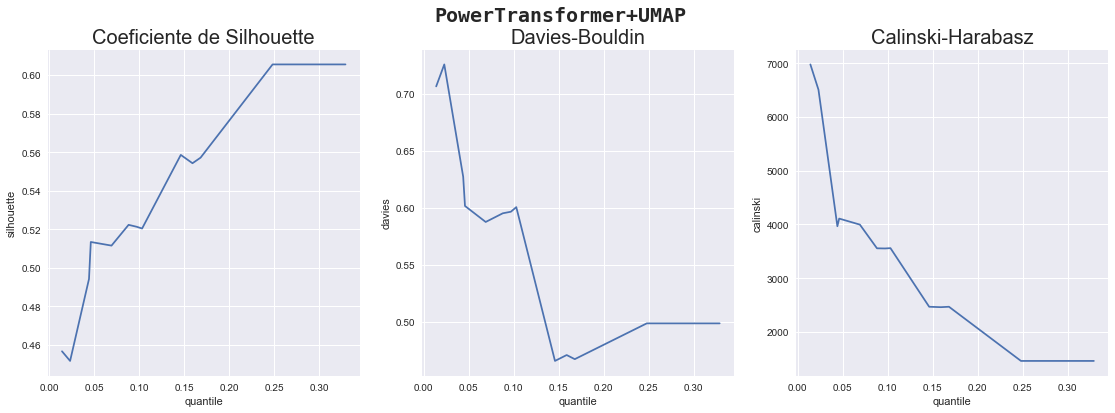

In [19]:
%%time
df_score,df_score_local,centro_clusters=mf.plot_inertia_sillhoutte_meanshift(df_score,df_power_UMAP_2_features, 0.01, 0.35, (19,6),'PowerTransformer+UMAP','MEANSHIFT','PowerTransformer','UMAP')


## <a class="anchor" id="semr">2. Sem Redução</a>
[Retorna ao Indice](#etapas)

## MinMaxScaler

,Algor.,Transf.,Red.Dim.,Features,quantile,clusters,silhouette,davies,calinski
0,MEANSHIFT,MinMaxScaler,SemRedução,17,0.034,93,0.116678,0.958135,38.956757
1,MEANSHIFT,MinMaxScaler,SemRedução,17,0.330,21,0.208072,1.076875,21.884667
2,MEANSHIFT,MinMaxScaler,SemRedução,17,0.296,24,0.180532,0.992706,20.432758
3,MEANSHIFT,MinMaxScaler,SemRedução,17,0.304,23,0.167946,0.875738,21.595350
4,MEANSHIFT,MinMaxScaler,SemRedução,17,0.129,42,0.060643,1.139615,27.465494
5,MEANSHIFT,MinMaxScaler,SemRedução,17,0.103,52,0.037161,1.149056,30.567713
6,MEANSHIFT,MinMaxScaler,SemRedução,17,0.018,143,0.056251,0.892927,35.113298
7,MEANSHIFT,MinMaxScaler,SemRedução,17,0.073,63,0.049866,1.042530,34.823421
8,MEANSHIFT,MinMaxScaler,SemRedução,17,0.282,21,0.270081,0.926092,21.026895
9,MEANSHIFT,MinMaxScaler,SemRedução,17,0.019,143,0.056251,0.892927,35.113298


Wall time: 49.5 s


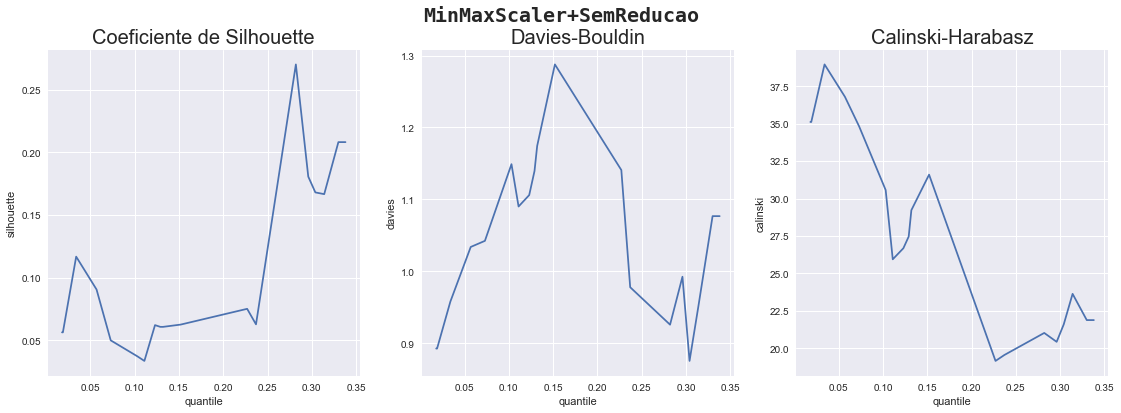

In [20]:
%%time
df_score,df_score_local,centro_clusters=mf.plot_inertia_sillhoutte_meanshift(df_score,df_minmax_SemReducao_17_features, 0.01, 0.35, (19,6),'MinMaxScaler+SemReducao','MEANSHIFT','MinMaxScaler','SemRedução')


## RobustScaler

,Algor.,Transf.,Red.Dim.,Features,quantile,clusters,silhouette,davies,calinski
0,MEANSHIFT,RobustScaler,SemRedução,17,0.292,75,0.496015,0.528019,125.352118
1,MEANSHIFT,RobustScaler,SemRedução,17,0.314,74,0.499755,0.527202,124.654565
2,MEANSHIFT,RobustScaler,SemRedução,17,0.191,79,0.415592,0.588393,121.471283
3,MEANSHIFT,RobustScaler,SemRedução,17,0.016,142,0.292137,0.607990,109.010271
4,MEANSHIFT,RobustScaler,SemRedução,17,0.168,81,0.415666,0.591280,119.304789
5,MEANSHIFT,RobustScaler,SemRedução,17,0.028,119,0.351411,0.540114,120.495505
6,MEANSHIFT,RobustScaler,SemRedução,17,0.092,88,0.406371,0.547159,122.037613
7,MEANSHIFT,RobustScaler,SemRedução,17,0.343,72,0.507002,0.549272,125.966124
8,MEANSHIFT,RobustScaler,SemRedução,17,0.016,142,0.292137,0.607990,109.010271
9,MEANSHIFT,RobustScaler,SemRedução,17,0.145,83,0.407572,0.610688,123.107356


Wall time: 22 s


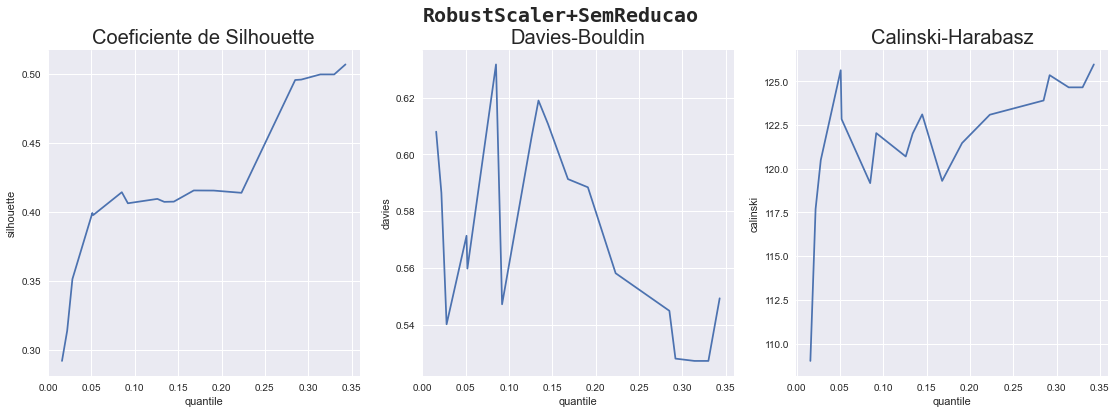

In [21]:
%%time
df_score,df_score_local,centro_clusters=mf.plot_inertia_sillhoutte_meanshift(df_score,df_robust_SemReducao_17_features, 0.01, 0.35, (19,6),'RobustScaler+SemReducao','MEANSHIFT','RobustScaler','SemRedução')


## PowerTransformer

,Algor.,Transf.,Red.Dim.,Features,quantile,clusters,silhouette,davies,calinski
0,MEANSHIFT,PowerTransformer,SemRedução,17,0.160,8,0.247722,1.236186,46.294409
1,MEANSHIFT,PowerTransformer,SemRedução,17,0.150,8,0.247722,1.236186,46.294409
2,MEANSHIFT,PowerTransformer,SemRedução,17,0.157,8,0.247722,1.236186,46.294409
3,MEANSHIFT,PowerTransformer,SemRedução,17,0.323,4,0.344296,0.958207,59.139598
4,MEANSHIFT,PowerTransformer,SemRedução,17,0.314,5,0.330624,1.159835,45.811080
5,MEANSHIFT,PowerTransformer,SemRedução,17,0.307,5,0.330624,1.159835,45.811080
6,MEANSHIFT,PowerTransformer,SemRedução,17,0.312,5,0.330624,1.159835,45.811080
7,MEANSHIFT,PowerTransformer,SemRedução,17,0.302,6,0.321887,1.132801,37.446204
8,MEANSHIFT,PowerTransformer,SemRedução,17,0.348,4,0.344296,0.958207,59.139598
9,MEANSHIFT,PowerTransformer,SemRedução,17,0.319,5,0.330624,1.159835,45.811080


Wall time: 10.9 s


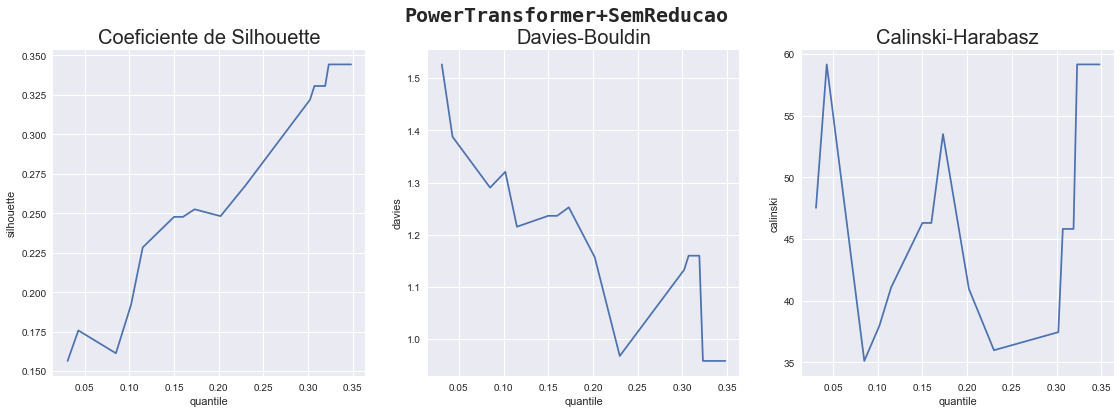

In [22]:
%%time
df_score,df_score_local,centro_clusters=mf.plot_inertia_sillhoutte_meanshift(df_score,df_power_SemReducao_17_features, 0.01, 0.35, (19,6),'PowerTransformer+SemReducao','MEANSHIFT','PowerTransformer','SemRedução')


## <a class="anchor" id="analise">3. Análise do dataframe df_score</a>
[Retorna ao Indice](#etapas)

In [23]:
df_score[df_score['silhouette']>0.50].sort_values(by='silhouette', ascending=True)

,Algor.,Transf.,Red.Dim.,Features,quantile,clusters,silhouette,davies,calinski
9,MEANSHIFT,MinMaxScaler,UMAP,2,0.243,4,0.503144,0.705257,2669.968562
7,MEANSHIFT,RobustScaler,SemRedução,17,0.343,72,0.507002,0.549272,125.966124
13,MEANSHIFT,PowerTransformer,UMAP,2,0.069,8,0.511570,0.587650,3997.457046
4,MEANSHIFT,PowerTransformer,UMAP,2,0.046,10,0.513450,0.601670,4109.568950
19,MEANSHIFT,MinMaxScaler,PCA,9,0.711,3,0.513884,0.955855,13.012338
2,MEANSHIFT,MinMaxScaler,PCA,9,0.741,3,0.513884,0.955855,13.012338
3,MEANSHIFT,MinMaxScaler,PCA,9,0.749,3,0.513884,0.955855,13.012338
11,MEANSHIFT,MinMaxScaler,PCA,9,0.783,3,0.513884,0.955855,13.012338
15,MEANSHIFT,MinMaxScaler,PCA,9,0.747,3,0.513884,0.955855,13.012338
17,MEANSHIFT,MinMaxScaler,PCA,9,0.838,3,0.513884,0.955855,13.012338


In [24]:
#Escolhido p/ K_MEANS:UMAP c/ PowerTransformer
#inertia=1322.840631   
#silhoutte=0.534755     
#davies=0.543320        
#calinski=4540.193466   
#clusters=8

#Escolhido DBSCAN após testes: UMAP c/ PowerTransformer
#silhoutte=0.432606
#davies=0.454361
#calinski=1097.023785
#eps=0.4
#clusters=6
         
#Selecionado após testes: UMAP c/ PowerTransformer
#silhoutte=0.559035
#davies=0.464891
#calinski=2464.37780
#quantile=0.127
#clusters=5

In [25]:
bandwidth = estimate_bandwidth(df_power_UMAP_2_features, quantile=0.127, n_samples=500)  
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df_power_UMAP_2_features)
labels = ms.labels_
centro_clusters = ms.cluster_centers_


In [26]:
df_clusters = pd.DataFrame(labels)
df_temp= df_power_UMAP_2_features.merge(df_clusters, left_index=True, right_index=True)
df_temp.rename({0: 'cluster'}, axis=1, inplace=True)
round(df_temp['cluster'].value_counts(normalize=True)*100,2)

0    51.09
1    30.34
2    10.92
3     3.92
4     3.74
Name: cluster, dtype: float64

In [27]:
#Atach clusters ao dataset
df_clusters = pd.DataFrame(labels)
df_abt= df_abt.merge(df_clusters, left_index=True, right_index=True)
df_abt.rename({0: 'cluster'}, axis=1, inplace=True)

In [28]:
df_abt_sc= df_abt_sc.merge(df_clusters, left_index=True, right_index=True)
df_abt_sc.rename({0: 'cluster'}, axis=1, inplace=True)


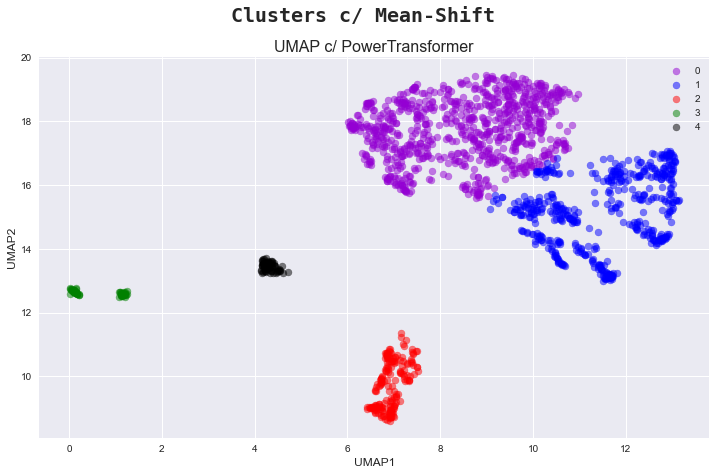

In [29]:

plt.style.use('seaborn')
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('UMAP1', fontsize=12)
ax.set_ylabel('UMAP2', fontsize=12)
ax.set_title('UMAP c/ PowerTransformer', fontsize= 16)
 
targets = [0, 1, 2, 3, 4 ]
colors = ['darkviolet','blue','red','green','black']
for target, color in zip(targets, colors):
    indicesToKeep = df_temp['cluster'] == target
    ax.scatter(df_temp.loc[indicesToKeep, 'TUMAP1'],
               df_temp.loc[indicesToKeep, 'TUMAP2'], c=color, s=50, alpha=0.5)

plt.suptitle('Clusters c/ Mean-Shift', fontsize = 20, fontname = 'monospace', weight = 'bold')    
ax.legend(targets)
#ax.grid()

In [30]:
df_score.to_excel(caminho_temp+'03_03_Modelos_MeanShift_df_score.xlsx', index=True)

In [31]:
df_abt.to_excel(caminho_temp+'03_03_Modelos_MeanShift_df_abt_ms_cluster.xlsx', index=True)

In [32]:
df_abt_sc.to_excel(caminho_temp+'03_03_Modelos_MeanShift_df_abt_sc_ms.xlsx', index=True)
